In [1]:
from db.excel_manager import ExcelDatabase

In [2]:
# create a database object
spreadsheet_name = 'simple_beam'
db = ExcelDatabase(f"tests/spreadsheets/{spreadsheet_name}.xlsx")
db.reparse_spreadsheet(name=spreadsheet_name)
# load an existing spreadsheet or start parsing 
db.load_spreadsheet()

INFO:db.database:Connecting to database: excel_agents
INFO:db.database:Successfully connected to MongoDB
INFO:db.excel_manager:Deleted spreadsheet 'simple_beam' (ID: 67f307ce67526437a5a61214) with 55 cells
INFO:db.excel_manager:Parsing spreadsheet: tests/spreadsheets/simple_beam.xlsx
INFO:parsers.excel_parser:Parsing Excel file: tests/spreadsheets/simple_beam.xlsx
INFO:parsers.excel_parser:Building alias mapping from defined names
INFO:parsers.excel_parser:Found 3 cell aliases across 1 sheets
INFO:parsers.excel_parser:Processing sheet: calcs
INFO:parsers.excel_parser:Sheet calcs dimensions: 27 rows x 12 columns
INFO:parsers.excel_parser:Expanded options: [{'cell_ref': 'J24', 'sheet_name': 'calcs', 'workbook_name': 'simple_beam.xlsx'}, {'cell_ref': 'J25', 'sheet_name': 'calcs', 'workbook_name': 'simple_beam.xlsx'}, {'cell_ref': 'J26', 'sheet_name': 'calcs', 'workbook_name': 'simple_beam.xlsx'}, {'cell_ref': 'J27', 'sheet_name': 'calcs', 'workbook_name': 'simple_beam.xlsx'}]
INFO:parsers

True

In [3]:
cell_data = db.get_cell_data("J9", "calcs")
cell_data

{'row': 8,
 'column': 9,
 'sheet': 'calcs',
 'value': {'raw': '=VLOOKUP(D7,calcs!J24:L27,2)', 'type': 'str'},
 'formatted_value': '=VLOOKUP(D7,calcs!J24:L27,2)',
 'alias': None,
 'value_list': [],
 'formula': '=VLOOKUP(D7,calcs!J24:L27,2)',
 'data_type': 'str',
 'cell_type': 'formula',
 'precedent_cells': [{'cell_ref': 'J24',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'J25',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'J26',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'J27',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'K24',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'K25',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'K26',
   'sheet_name': 'calcs',
   'workbook_name': 'simple_beam.xlsx'},
  {'cell_ref': 'K27',
   'sheet_name': 'calcs',
   'workbook_name': 'si

In [4]:
spreadsheet_data = db.get_spreadsheet_data(name="simple_beam", as_dict=True)
spreadsheet_data

{'id': '67f3080d2f6e2afc0ef9cefa',
 'name': 'simple_beam',
 'original_filename': 'simple_beam.xlsx',
 'file_path': 'tests/spreadsheets/simple_beam.xlsx',
 'sheet_names': ['calcs', 'sections'],
 'active_sheet': 'calcs',
 'cell_count': 55,
 'cell_references': [{'cell_ref': 'C3', 'sheet_name': 'calcs'},
  {'cell_ref': 'D3', 'sheet_name': 'calcs'},
  {'cell_ref': 'F3', 'sheet_name': 'calcs'},
  {'cell_ref': 'C4', 'sheet_name': 'calcs'},
  {'cell_ref': 'D4', 'sheet_name': 'calcs'},
  {'cell_ref': 'F4', 'sheet_name': 'calcs'},
  {'cell_ref': 'C5', 'sheet_name': 'calcs'},
  {'cell_ref': 'D5', 'sheet_name': 'calcs'},
  {'cell_ref': 'F5', 'sheet_name': 'calcs'},
  {'cell_ref': 'C6', 'sheet_name': 'calcs'},
  {'cell_ref': 'D6', 'sheet_name': 'calcs'},
  {'cell_ref': 'F6', 'sheet_name': 'calcs'},
  {'cell_ref': 'C7', 'sheet_name': 'calcs'},
  {'cell_ref': 'D7', 'sheet_name': 'calcs'},
  {'cell_ref': 'H9', 'sheet_name': 'calcs'},
  {'cell_ref': 'I9', 'sheet_name': 'calcs'},
  {'cell_ref': 'J9', 's

[['calcs!D3',
  'calcs!D4',
  'calcs!D5',
  'calcs!D6',
  'calcs!D7',
  'calcs!J24',
  'calcs!J25',
  'calcs!J26',
  'calcs!J27',
  'calcs!K24',
  'calcs!K25',
  'calcs!K26',
  'calcs!K27',
  'calcs!L24',
  'calcs!L25',
  'calcs!L26',
  'calcs!L27',
  'calcs!D15'],
 ['calcs!E19', 'calcs!E20', 'calcs!J9', 'calcs!J10', 'calcs!D16'],
 ['calcs!L9', 'calcs!L10'],
 ['calcs!L13']]

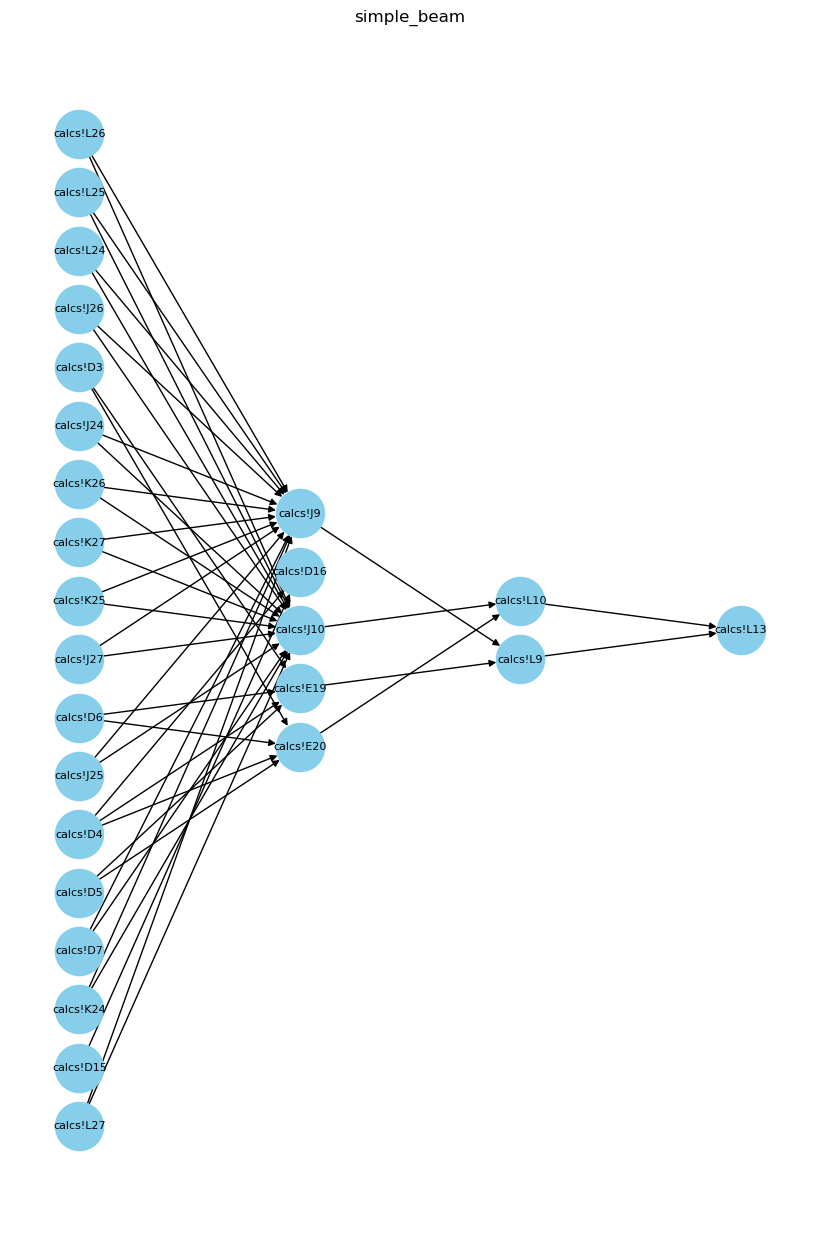

In [5]:
from operators.functions.graph import ComputeGraph

# Initialize
graph = ComputeGraph(spreadsheet_data, db)

# Build the graph and create layers
graph.build_graph()
graph.create_layers()

# Visualize
graph.visualize(
    figsize=(8, 12),
    node_size=1200,
    title=spreadsheet_name,
    save_path=f"graph_{spreadsheet_name}.png"  # Optional - saves to file instead of displaying
)

graph.layers

In [6]:
def get_validation_options_extended(wb, ws, cell_address):
    if ws.data_validations is None:
        return None

    for dv in ws.data_validations.dataValidation:
        print("check")
        ranges = []
        if hasattr(dv.sqref, 'ranges'):
            ranges = [str(r) for r in dv.sqref.ranges]
        elif isinstance(dv.sqref, str):
            ranges = dv.sqref.split(',')
        else:
            ranges = [str(dv.sqref)]
        
        for rng in ranges:
            if cell_in_range(cell_address, rng.strip()):
                formula = dv.formula1
                # If the formula is a literal list (e.g., "Option1,Option2")
                if formula.startswith('"') and formula.endswith('"'):
                    formula = formula[1:-1]
                    options = [opt.strip() for opt in formula.split(',')]
                    return options
                # If the formula is a reference to a range in another sheet, e.g., "Sheet2!$A$1:$A$10"
                elif "!" in formula:
                    sheet_name, cell_range = formula.split("!")
                    sheet_name = sheet_name.strip("'")  # remove quotes if present
                    try:
                        ref_ws = wb[sheet_name]
                    except KeyError:
                        print(f"Sheet {sheet_name} not found in workbook.")
                        return None
                    min_col, min_row, max_col, max_row = range_boundaries(cell_range)
                    options = []
                    for row in ref_ws.iter_rows(min_row=min_row, max_row=max_row,
                                                min_col=min_col, max_col=max_col):
                        for cell in row:
                            if cell.value is not None:
                                options.append(cell.value)
                    return options
    return None

# Usage
workbook_path = 'tests/spreadsheets/simple_beam.xlsx'
wb = openpyxl.load_workbook(workbook_path)
ws = wb['calcs']
cell_address = 'D7'

options = get_validation_options_extended(wb, ws, cell_address)
if options:
    print(f"Data validation options for cell {cell_address}: {options}")
else:
    print(f"No data validation found for cell {cell_address}.")

NameError: name 'openpyxl' is not defined